In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import numpy as np

In [5]:
dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')

df_combined = pd.concat([dfElche, dfOrihuela, dfTorrevieja], ignore_index=True)

df_combined.tail(10)

C:\Users\snkle\AppData\Local\Temp\ipykernel_24500\3537616911.py:1: DtypeWarning: Columns (6,20,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_24500\3537616911.py:2: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_24500\3537616911.py:3: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')


,Unnamed: 0,COD_ESTACION,NOM_ESTACION,FECHA,HORA,SO2,CO,NO,NO2,NOx,O3,PM10,PM2.5,PM1,NH3,C6H6,C7H8,C8H10,Direc.,H.Rel.,Precip.,Pres.,R.Sol.,Ruido,Temp.,UV-B,Veloc.,Veloc.max.,As,BaA,BaP,BbFA,BjFA,BkFA,Cd,CH4,DahA,FA,HCT,HMN,HNM,H2S,IcdP,Ni,Pb,PST,BbFA+BjFA+BkFA,PM2.5d,PM10d
492206,492206,3133002,TORREVIEJA,2024-11-30,14,NaN,NaN,4.0,9.0,15.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"20,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492207,492207,3133002,TORREVIEJA,2024-11-30,15,NaN,NaN,3.0,9.0,14.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"20,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492208,492208,3133002,TORREVIEJA,2024-11-30,16,NaN,NaN,3.0,13.0,17.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"19,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492209,492209,3133002,TORREVIEJA,2024-11-30,17,NaN,NaN,3.0,16.0,20.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"18,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492210,492210,3133002,TORREVIEJA,2024-11-30,18,NaN,NaN,6.0,40.0,49.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"17,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492211,492211,3133002,TORREVIEJA,2024-11-30,19,NaN,NaN,16.0,59.0,83.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"17,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492212,492212,3133002,TORREVIEJA,2024-11-30,20,NaN,NaN,35.0,57.0,111.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"16,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492213,492213,3133002,TORREVIEJA,2024-11-30,21,NaN,NaN,21.0,47.0,79.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"15,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492214,492214,3133002,TORREVIEJA,2024-11-30,22,NaN,NaN,13.0,30.0,49.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"15,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492215,492215,3133002,TORREVIEJA,2024-11-30,23,NaN,NaN,9.0,21.0,35.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,"14,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veo la cantidad de nulos

In [6]:
df_combined.isnull().sum()

Unnamed: 0             0
COD_ESTACION           0
NOM_ESTACION           0
FECHA                  0
HORA                   0
SO2               242857
CO                265317
NO                201861
NO2               201849
NOx               201861
O3                 56660
PM10              438481
PM2.5             430276
PM1               489673
NH3               492216
C6H6              492216
C7H8              492216
C8H10             492216
Direc.            231685
H.Rel.             52558
Precip.           233004
Pres.             232397
R.Sol.            240178
Ruido             492216
Temp.              48660
UV-B              492216
Veloc.            236880
Veloc.max.        477678
As                492216
BaA               492216
BaP               492216
BbFA              492216
BjFA              492216
BkFA              492216
Cd                492216
CH4               492216
DahA              492216
FA                492216
HCT               492216
HMN               492216


Relleno las columnas con menos de mil nulos

In [12]:
df_combined = df_combined.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' or col.dtypes.name == 'category' else col)
df_combined

,Unnamed: 0,COD_ESTACION,NOM_ESTACION,FECHA,HORA,SO2,CO,NO,NO2,NOx,O3,Direc.,H.Rel.,Precip.,Pres.,R.Sol.,Temp.,Veloc.,Veloc.max.
0,0,3065006,0,0,0,NaN,-1,NaN,NaN,NaN,61.0,NaN,68.0,-1,NaN,NaN,-1,-1,-1
1,1,3065006,0,0,1,NaN,-1,NaN,NaN,NaN,61.0,NaN,68.0,-1,NaN,NaN,-1,-1,-1
2,2,3065006,0,0,2,NaN,-1,NaN,NaN,NaN,61.0,NaN,68.0,-1,NaN,NaN,-1,-1,-1
3,3,3065006,0,0,3,NaN,-1,NaN,NaN,NaN,61.0,NaN,68.0,-1,NaN,NaN,-1,-1,-1
4,4,3065006,0,0,4,NaN,-1,NaN,NaN,NaN,61.0,NaN,68.0,-1,NaN,NaN,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492211,492211,3133002,2,8188,19,NaN,-1,16.0,59.0,83.0,6.0,NaN,99.0,-1,NaN,NaN,573,-1,-1
492212,492212,3133002,2,8188,20,NaN,-1,35.0,57.0,111.0,3.0,NaN,99.0,-1,NaN,NaN,555,-1,-1
492213,492213,3133002,2,8188,21,NaN,-1,21.0,47.0,79.0,3.0,NaN,99.0,-1,NaN,NaN,537,-1,-1
492214,492214,3133002,2,8188,22,NaN,-1,13.0,30.0,49.0,5.0,NaN,99.0,-1,NaN,NaN,533,-1,-1


In [14]:
columnas_menos_nulos = df_combined.columns[df_combined.isnull().sum() < 400000]

for col in columnas_menos_nulos:
    df_combined[col].fillna(df_combined[col].median(), inplace=True)

C:\Users\snkle\AppData\Local\Temp\ipykernel_24500\3271397801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[col].fillna(df_combined[col].median(), inplace=True)
C:\Users\snkle\AppData\Local\Temp\ipykernel_24500\3271397801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [15]:
df_combined.isnull().sum()

Unnamed: 0      0
COD_ESTACION    0
NOM_ESTACION    0
FECHA           0
HORA            0
SO2             0
CO              0
NO              0
NO2             0
NOx             0
O3              0
Direc.          0
H.Rel.          0
Precip.         0
Pres.           0
R.Sol.          0
Temp.           0
Veloc.          0
Veloc.max.      0
dtype: int64

Elimino las que tengan mas nulos 

In [16]:
nulos_por_columna = df_combined.isnull().sum()
columnas_mas_1000_nulos = nulos_por_columna[nulos_por_columna >= 400000].index

df_combined.drop(columns=columnas_mas_1000_nulos, inplace=True)

In [17]:
df_combined.isnull().sum()

Unnamed: 0      0
COD_ESTACION    0
NOM_ESTACION    0
FECHA           0
HORA            0
SO2             0
CO              0
NO              0
NO2             0
NOx             0
O3              0
Direc.          0
H.Rel.          0
Precip.         0
Pres.           0
R.Sol.          0
Temp.           0
Veloc.          0
Veloc.max.      0
dtype: int64

In [18]:
y = df_combined['SO2']
X = df_combined.drop(['SO2'],axis=1)

In [19]:
y

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
492211    3.0
492212    3.0
492213    3.0
492214    3.0
492215    3.0
Name: SO2, Length: 492216, dtype: float64

In [20]:
X

,Unnamed: 0,COD_ESTACION,NOM_ESTACION,FECHA,HORA,CO,NO,NO2,NOx,O3,Direc.,H.Rel.,Precip.,Pres.,R.Sol.,Temp.,Veloc.,Veloc.max.
0,0,3065006,0,0,0,-1,2.0,8.0,12.0,61.0,216.0,68.0,-1,1015.0,3.0,-1,-1,-1
1,1,3065006,0,0,1,-1,2.0,8.0,12.0,61.0,216.0,68.0,-1,1015.0,3.0,-1,-1,-1
2,2,3065006,0,0,2,-1,2.0,8.0,12.0,61.0,216.0,68.0,-1,1015.0,3.0,-1,-1,-1
3,3,3065006,0,0,3,-1,2.0,8.0,12.0,61.0,216.0,68.0,-1,1015.0,3.0,-1,-1,-1
4,4,3065006,0,0,4,-1,2.0,8.0,12.0,61.0,216.0,68.0,-1,1015.0,3.0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492211,492211,3133002,2,8188,19,-1,16.0,59.0,83.0,6.0,216.0,99.0,-1,1015.0,3.0,573,-1,-1
492212,492212,3133002,2,8188,20,-1,35.0,57.0,111.0,3.0,216.0,99.0,-1,1015.0,3.0,555,-1,-1
492213,492213,3133002,2,8188,21,-1,21.0,47.0,79.0,3.0,216.0,99.0,-1,1015.0,3.0,537,-1,-1
492214,492214,3133002,2,8188,22,-1,13.0,30.0,49.0,5.0,216.0,99.0,-1,1015.0,3.0,533,-1,-1


In [21]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
model.score(X_test,y_test)

0.9027568973223355

Usando Dos algoritmos y viendo con graficas cada uno Automatizado

C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\1181484005.py:11: DtypeWarning: Columns (6,20,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\1181484005.py:12: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\1181484005.py:13: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')


        Unnamed: 0  COD_ESTACION NOM_ESTACION       FECHA  HORA  SO2   CO  \
492206      492206       3133002   TORREVIEJA  2024-11-30    14  NaN  NaN   
492207      492207       3133002   TORREVIEJA  2024-11-30    15  NaN  NaN   
492208      492208       3133002   TORREVIEJA  2024-11-30    16  NaN  NaN   
492209      492209       3133002   TORREVIEJA  2024-11-30    17  NaN  NaN   
492210      492210       3133002   TORREVIEJA  2024-11-30    18  NaN  NaN   
492211      492211       3133002   TORREVIEJA  2024-11-30    19  NaN  NaN   
492212      492212       3133002   TORREVIEJA  2024-11-30    20  NaN  NaN   
492213      492213       3133002   TORREVIEJA  2024-11-30    21  NaN  NaN   
492214      492214       3133002   TORREVIEJA  2024-11-30    22  NaN  NaN   
492215      492215       3133002   TORREVIEJA  2024-11-30    23  NaN  NaN   

          NO   NO2    NOx  ...  HMN  HNM  H2S  IcdP  Ni  Pb  PST  \
492206   4.0   9.0   15.0  ...  NaN  NaN  NaN   NaN NaN NaN  NaN   
492207   3.0   9

C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\1181484005.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[col].fillna(df_combined[col].median(), inplace=True)
C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\1181484005.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Unnamed: 0             0
COD_ESTACION           0
NOM_ESTACION           0
FECHA                  0
HORA                   0
SO2                    0
CO                     0
NO                     0
NO2                    0
NOx                    0
O3                     0
PM10              438481
PM2.5             430276
PM1               489673
NH3               492216
C6H6              492216
C7H8              492216
C8H10             492216
Direc.                 0
H.Rel.                 0
Precip.                0
Pres.                  0
R.Sol.                 0
Ruido             492216
Temp.                  0
UV-B              492216
Veloc.                 0
Veloc.max.             0
As                492216
BaA               492216
BaP               492216
BbFA              492216
BjFA              492216
BkFA              492216
Cd                492216
CH4               492216
DahA              492216
FA                492216
HCT               492216
HMN               492216


C:\Users\snkle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión de RandomForest: 90.23%
Precisión de LogisticRegression: 80.92%


C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\1181484005.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


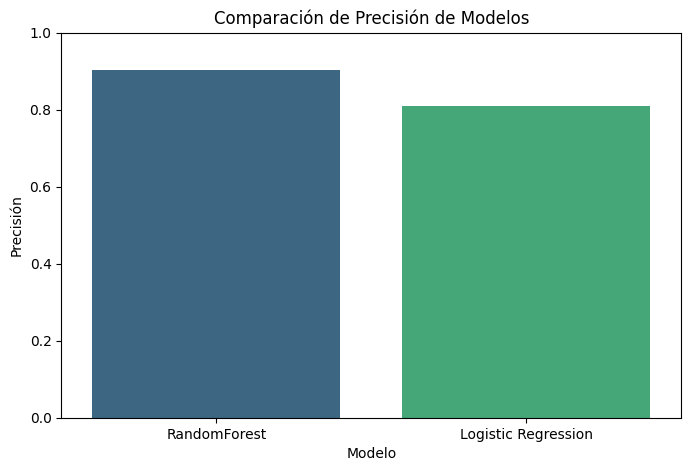

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los archivos CSV
dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')

# Concatenar los DataFrames
df_combined = pd.concat([dfElche, dfOrihuela, dfTorrevieja], ignore_index=True)

# Mostrar las últimas 10 filas
print(df_combined.tail(10))

# Comprobar valores nulos
print(df_combined.isnull().sum())

# Convertir columnas de tipo 'object' o 'category' a códigos numéricos
df_combined = df_combined.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' or col.dtypes.name == 'category' else col)

# Imprimir DataFrame
print(df_combined)

# Seleccionar columnas con menos de 400,000 valores nulos
columnas_menos_nulos = df_combined.columns[df_combined.isnull().sum() < 400000]

# Rellenar valores nulos con la mediana
for col in columnas_menos_nulos:
    df_combined[col].fillna(df_combined[col].median(), inplace=True)

# Comprobar de nuevo los valores nulos
print(df_combined.isnull().sum())

# Eliminar columnas con más de 400,000 valores nulos
nulos_por_columna = df_combined.isnull().sum()
columnas_mas_1000_nulos = nulos_por_columna[nulos_por_columna >= 400000].index
df_combined.drop(columns=columnas_mas_1000_nulos, inplace=True)

# Comprobar si hay más valores nulos
print(df_combined.isnull().sum())

# Separar la variable dependiente (SO2) de las independientes
y = df_combined['SO2']
X = df_combined.drop(['SO2'], axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar los modelos
rf_model = RandomForestClassifier()
lr_model = LogisticRegression(max_iter=1000)


# Entrenar los modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Hacer predicciones
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)


# Evaluar precisión de ambos modelos
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)


# Mostrar precisión de ambos modelos
print(f"Precisión de RandomForest: {rf_accuracy * 100:.2f}%")
print(f"Precisión de LogisticRegression: {lr_accuracy * 100:.2f}%")

# Graficar resultados
models = ['RandomForest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]

# Configuración de las gráficas
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparación de Precisión de Modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.show()


Sacando el ml a un archivo pickle

Modelo con el target O3

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Leer los archivos CSV
dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')

# Concatenar los DataFrames
df_combined = pd.concat([dfElche, dfOrihuela, dfTorrevieja], ignore_index=True)

# Mostrar las últimas 10 filas
print(df_combined.tail(10))

# Comprobar valores nulos iniciales
print("\nValores nulos iniciales por columna:")
print(df_combined.isnull().sum())

# **Transformar la columna FECHA en características temporales útiles**
if 'FECHA' in df_combined.columns:
    # Convertir la columna FECHA a datetime
    df_combined['FECHA'] = pd.to_datetime(df_combined['FECHA'], errors='coerce')

    # Extraer características de la fecha (año, mes, día)
    df_combined['año'] = df_combined['FECHA'].dt.year
    df_combined['mes'] = df_combined['FECHA'].dt.month
    df_combined['dia'] = df_combined['FECHA'].dt.day

# Mantener únicamente las columnas necesarias
columns_to_keep = ['año', 'mes', 'dia', 'HORA', 'NOM_ESTACION', 'O3']
df_combined = df_combined[columns_to_keep]

# Mostrar datos transformados
print("\nPrimeras filas de datos transformados:")
print(df_combined.head())

# Eliminar filas con valores nulos en la columna target (O3)
df_combined.dropna(subset=['O3'], inplace=True)

# Comprobar valores nulos después de eliminar filas con nulos en O3
print("\nValores nulos después de eliminar filas con nulos en O3:")
print(df_combined.isnull().sum())

# Convertir columnas de tipo 'object' o 'category' a códigos numéricos
df_combined = df_combined.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' or col.dtypes.name == 'category' else col)

# Separar la variable dependiente (O3) de las independientes
y = df_combined['O3']
X = df_combined.drop(['O3'], axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar los modelos
rf_model = RandomForestClassifier()
lr_model = LogisticRegression(max_iter=1000)

# Entrenar los modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Hacer predicciones
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluar precisión de ambos modelos
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Mostrar precisión de ambos modelos
print(f"\nPrecisión de RandomForest: {rf_accuracy * 100:.2f}%")
print(f"Precisión de LogisticRegression: {lr_accuracy * 100:.2f}%")

# Guardar el modelo con mejor puntaje en un archivo pickle
best_model = rf_model if rf_accuracy > lr_accuracy else lr_model
target_name = 'O3'
pickle_filename = f"{target_name}_model.pkl"

with open(pickle_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nModelo con mejor puntaje ({'RandomForest' if best_model == rf_model else 'Logistic Regression'}) guardado como '{pickle_filename}'.")


C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\4049784065.py:10: DtypeWarning: Columns (6,20,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\4049784065.py:11: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_21896\4049784065.py:12: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')


        Unnamed: 0  COD_ESTACION NOM_ESTACION       FECHA  HORA  SO2   CO  \
492206      492206       3133002   TORREVIEJA  2024-11-30    14  NaN  NaN   
492207      492207       3133002   TORREVIEJA  2024-11-30    15  NaN  NaN   
492208      492208       3133002   TORREVIEJA  2024-11-30    16  NaN  NaN   
492209      492209       3133002   TORREVIEJA  2024-11-30    17  NaN  NaN   
492210      492210       3133002   TORREVIEJA  2024-11-30    18  NaN  NaN   
492211      492211       3133002   TORREVIEJA  2024-11-30    19  NaN  NaN   
492212      492212       3133002   TORREVIEJA  2024-11-30    20  NaN  NaN   
492213      492213       3133002   TORREVIEJA  2024-11-30    21  NaN  NaN   
492214      492214       3133002   TORREVIEJA  2024-11-30    22  NaN  NaN   
492215      492215       3133002   TORREVIEJA  2024-11-30    23  NaN  NaN   

          NO   NO2    NOx  ...  HMN  HNM  H2S  IcdP  Ni  Pb  PST  \
492206   4.0   9.0   15.0  ...  NaN  NaN  NaN   NaN NaN NaN  NaN   
492207   3.0   9

KeyboardInterrupt: 

modelo con target CO

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Leer los archivos CSV
dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')

# Concatenar los DataFrames
df_combined = pd.concat([dfElche, dfOrihuela, dfTorrevieja], ignore_index=True)

# Mostrar las últimas 10 filas
print(df_combined.tail(10))

# Comprobar valores nulos iniciales
print("\nValores nulos iniciales por columna:")
print(df_combined.isnull().sum())

# **Transformar la columna FECHA en características temporales útiles**
if 'FECHA' in df_combined.columns:
    # Convertir la columna FECHA a datetime
    df_combined['FECHA'] = pd.to_datetime(df_combined['FECHA'], errors='coerce')

    # Extraer características de la fecha (año, mes, día)
    df_combined['año'] = df_combined['FECHA'].dt.year
    df_combined['mes'] = df_combined['FECHA'].dt.month
    df_combined['dia'] = df_combined['FECHA'].dt.day

# Mantener únicamente las columnas necesarias
columns_to_keep = ['año', 'mes', 'dia', 'HORA', 'NOM_ESTACION', 'CO']
df_combined = df_combined[columns_to_keep]

# Mostrar datos transformados
print("\nPrimeras filas de datos transformados:")
print(df_combined.head())

# Eliminar filas con valores nulos en la columna target (CO)
df_combined.dropna(subset=['CO'], inplace=True)

# Comprobar valores nulos después de eliminar filas con nulos en CO
print("\nValores nulos después de eliminar filas con nulos en CO:")
print(df_combined.isnull().sum())

# Convertir columnas de tipo 'object' o 'category' a códigos numéricos
df_combined = df_combined.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' or col.dtypes.name == 'category' else col)

# Separar la variable dependiente (CO) de las independientes
y = df_combined['CO']
X = df_combined.drop(['CO'], axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar los modelos
rf_model = RandomForestClassifier()
lr_model = LogisticRegression(max_iter=1000)

# Entrenar los modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Hacer predicciones
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluar precisión de ambos modelos
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Mostrar precisión de ambos modelos
print(f"\nPrecisión de RandomForest: {rf_accuracy * 100:.2f}%")
print(f"Precisión de LogisticRegression: {lr_accuracy * 100:.2f}%")

# Guardar el modelo con mejor puntaje en un archivo pickle
best_model = rf_model if rf_accuracy > lr_accuracy else lr_model
target_name = 'CO'
pickle_filename = f"{target_name}_model.pkl"

with open(pickle_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nModelo con mejor puntaje ({'RandomForest' if best_model == rf_model else 'Logistic Regression'}) guardado como '{pickle_filename}'.")


C:\Users\snkle\AppData\Local\Temp\ipykernel_8792\2500449987.py:10: DtypeWarning: Columns (6,20,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_8792\2500449987.py:11: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_8792\2500449987.py:12: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')


        Unnamed: 0  COD_ESTACION NOM_ESTACION       FECHA  HORA  SO2   CO  \
492206      492206       3133002   TORREVIEJA  2024-11-30    14  NaN  NaN   
492207      492207       3133002   TORREVIEJA  2024-11-30    15  NaN  NaN   
492208      492208       3133002   TORREVIEJA  2024-11-30    16  NaN  NaN   
492209      492209       3133002   TORREVIEJA  2024-11-30    17  NaN  NaN   
492210      492210       3133002   TORREVIEJA  2024-11-30    18  NaN  NaN   
492211      492211       3133002   TORREVIEJA  2024-11-30    19  NaN  NaN   
492212      492212       3133002   TORREVIEJA  2024-11-30    20  NaN  NaN   
492213      492213       3133002   TORREVIEJA  2024-11-30    21  NaN  NaN   
492214      492214       3133002   TORREVIEJA  2024-11-30    22  NaN  NaN   
492215      492215       3133002   TORREVIEJA  2024-11-30    23  NaN  NaN   

          NO   NO2    NOx  ...  HMN  HNM  H2S  IcdP  Ni  Pb  PST  \
492206   4.0   9.0   15.0  ...  NaN  NaN  NaN   NaN NaN NaN  NaN   
492207   3.0   9

C:\Users\snkle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión de RandomForest: 88.90%
Precisión de LogisticRegression: 80.92%
Modelo con mejor puntaje (RandomForest) guardado como 'SO2_model.pkl'.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

# Leer los archivos CSV
dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')

# Concatenar los DataFrames
df_combined = pd.concat([dfElche, dfOrihuela, dfTorrevieja], ignore_index=True)

# Mostrar las últimas 10 filas
print(df_combined.tail(10))

# Comprobar valores nulos iniciales
print("\nValores nulos iniciales por columna:")
print(df_combined.isnull().sum())

# **Transformar la columna FECHA en características temporales útiles**
if 'FECHA' in df_combined.columns:
    # Convertir la columna FECHA a datetime
    df_combined['FECHA'] = pd.to_datetime(df_combined['FECHA'], errors='coerce')

    # Extraer características de la fecha (año, mes, día)
    df_combined['año'] = df_combined['FECHA'].dt.year
    df_combined['mes'] = df_combined['FECHA'].dt.month
    df_combined['dia'] = df_combined['FECHA'].dt.day

# Mantener únicamente las columnas necesarias
columns_to_keep = ['año', 'mes', 'dia', 'HORA', 'NOM_ESTACION', 'SO2']
df_combined = df_combined[columns_to_keep]

# Mostrar datos transformados
print("\nPrimeras filas de datos transformados:")
print(df_combined.head())

# Eliminar filas con valores nulos en la columna target (SO2)
df_combined.dropna(subset=['SO2'], inplace=True)

# Comprobar valores nulos después de eliminar filas con nulos en SO2
print("\nValores nulos después de eliminar filas con nulos en SO2:")
print(df_combined.isnull().sum())

# Convertir columnas de tipo 'object' o 'category' a códigos numéricos
df_combined = df_combined.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' or col.dtypes.name == 'category' else col)

# Separar la variable dependiente (SO2) de las independientes
y = df_combined['SO2']
X = df_combined.drop(['SO2'], axis=1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar los modelos
rf_model = RandomForestClassifier()
lr_model = LogisticRegression(max_iter=1000)

# Entrenar los modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Hacer predicciones
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluar precisión de ambos modelos
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Mostrar precisión de ambos modelos
print(f"\nPrecisión de RandomForest: {rf_accuracy * 100:.2f}%")
print(f"Precisión de LogisticRegression: {lr_accuracy * 100:.2f}%")

# Guardar el modelo con mejor puntaje en un archivo pickle
best_model = rf_model if rf_accuracy > lr_accuracy else lr_model
target_name = 'SO2'
pickle_filename = f"{target_name}_model.pkl"

with open(pickle_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"\nModelo con mejor puntaje ({'RandomForest' if best_model == rf_model else 'Logistic Regression'}) guardado como '{pickle_filename}'.")


C:\Users\snkle\AppData\Local\Temp\ipykernel_20696\298896644.py:10: DtypeWarning: Columns (6,20,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfElche = pd.read_csv('../Procesamiento/Elche-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_20696\298896644.py:11: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfOrihuela = pd.read_csv('../Procesamiento/Orihuela-limpio.csv', sep=';')
C:\Users\snkle\AppData\Local\Temp\ipykernel_20696\298896644.py:12: DtypeWarning: Columns (6,20,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTorrevieja = pd.read_csv('../Procesamiento/Torrevieja-limpio.csv', sep=';')


        Unnamed: 0  COD_ESTACION NOM_ESTACION       FECHA  HORA  SO2   CO  \
492206      492206       3133002   TORREVIEJA  2024-11-30    14  NaN  NaN   
492207      492207       3133002   TORREVIEJA  2024-11-30    15  NaN  NaN   
492208      492208       3133002   TORREVIEJA  2024-11-30    16  NaN  NaN   
492209      492209       3133002   TORREVIEJA  2024-11-30    17  NaN  NaN   
492210      492210       3133002   TORREVIEJA  2024-11-30    18  NaN  NaN   
492211      492211       3133002   TORREVIEJA  2024-11-30    19  NaN  NaN   
492212      492212       3133002   TORREVIEJA  2024-11-30    20  NaN  NaN   
492213      492213       3133002   TORREVIEJA  2024-11-30    21  NaN  NaN   
492214      492214       3133002   TORREVIEJA  2024-11-30    22  NaN  NaN   
492215      492215       3133002   TORREVIEJA  2024-11-30    23  NaN  NaN   

          NO   NO2    NOx  ...  HMN  HNM  H2S  IcdP  Ni  Pb  PST  \
492206   4.0   9.0   15.0  ...  NaN  NaN  NaN   NaN NaN NaN  NaN   
492207   3.0   9

C:\Users\snkle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Precisión de RandomForest: 80.96%
Precisión de LogisticRegression: 62.44%

Modelo con mejor puntaje (RandomForest) guardado como 'SO2_model.pkl'.
